In [47]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [48]:
df = pd.read_csv('Training_set.csv', index_col=0)

In [49]:
df.head()

,ASECWT,RELATE,AGE,SEX,RACE,MARST,POPSTAT,VETSTAT,FAMREL,BPL,YRIMMIG,OCC2010,IND1990,CLASSWKR,UHRSWORK1,EDUC,EDUC99,DIFFANY,INCTOT
0,1316.02,101,73,1,100,6,1,2,0,9900,0,9920,0,0,999,92,14,2,50202
1,824.29,101,48,1,100,1,1,1,1,9900,0,5550,412,25,997,91,13,1,19201
2,824.29,201,55,2,100,1,1,1,2,9900,0,420,850,21,40,123,16,1,121684
3,731.67,301,12,1,100,6,3,0,3,9900,0,9920,0,0,999,1,0,0,999999999
4,1106.47,301,6,2,200,6,3,0,3,9900,0,9920,0,0,999,1,0,0,999999999


In [50]:
df.shape

(144000, 19)

In [51]:
#MAKE TARGET VARIABLE BINARY
df['INCTOT'] = np.where(df['INCTOT'] > 63179, 1, 0)

In [52]:
df.INCTOT.value_counts()

0    90065
1    53935
Name: INCTOT, dtype: int64

# DATA CLEANING

## RECODING CATEGORICAL VARIABLES

In [53]:
# RELATIONSHIP TO HOUSEHOLD HEAD
df['RELATE'].replace({101:'head', 
                    201:'spouse',  
                    301:'child', 
                    1114:'unmarried partner',
                    901:'grandchild', 
                    501:'parent', 
                    1001:'other relative',
                    1115:'roommate', 
                    701:'sibling', 
                    1260:'other nonrelative',
                    1241:'lodger', 
                    1242:'foster children'}, inplace=True)


In [54]:
# CONSOLIDATE VALUES
df['RELATE'].replace({'lodger':'roommate', 
                    'unmarried':'spouse',  
                    'foster children':'child'}, inplace=True)


In [55]:
df.AGE.value_counts()

17    2379
85    2352
10    2336
11    2288
80    2286
      ... 
75     893
76     786
77     731
78     639
79     586
Name: AGE, Length: 82, dtype: int64

In [56]:
df.SEX.value_counts()

2    74380
1    69620
Name: SEX, dtype: int64

In [57]:
# RECODE RACE
df['RACE'].replace({100:'white', 
                    200:'african-american',  
                    651:'asian', 
                    300:'eskimo',
                    802:'white-american-indian', 
                    801:'white-african-american', 
                    652:'hawaiian',
                    803:'white-asian', 
                    805:'african-american-american-indian', 
                    810:'white-african-american-american-indian',
                    804:'white-hawaiian', 
                    809:'asian-hawaiian',
     
                    813:'white-asian-hawaiian',  
                    806:'african-american-asian', 
                    812:'white-american-indian-asian',
                    830:'four-or-five-races', 
                    807:'african-american-hawaiian', 
                    811:'white-african-american-asian',
                    816:'white-african-american-hawaiian', 
                    808:'american-indian-asian', 
                    814:'white-african-american-american-indian-asian',
                    820:'unspecified-two-or-three-races', 
                    818:'african-american-american-indian-asian',
                    819:'white-american-indian-asian-hawaiian',
                    815: 'american-indian-hawaiian'}, inplace=True)



In [58]:
# CONSOLIDATE RACE COLUMN
df['RACE'].replace({
                    "white-american-indian":'mixed', 
                    "white-african-american":'mixed',  
                    "african-american-american-indian":'mixed', 
                    "white-african-american-american-indian":'mixed',
                    "white-hawaiian":'mixed', 
                    "white-asian":'mixed', 
                    "asian-hawaiian":'mixed',
                    "white-asian-hawaiian":'mixed', 
                    "african-american-asian":'mixed', 
                    "white-american-indian-asian":'mixed',
                    "four-or-five-races":'mixed', 
                    "african-american-hawaiian":'mixed',
                    "white-african-american-asian":'mixed', 
                    "white-african-american-hawaiian":'mixed',
                    "white-african-american-american-indian-asian":'mixed', 
                    "american-indian-asian":'mixed', 
                    "unspecified-two-or-three-races":'mixed',
                    "african-american-american-indian-asian":'mixed',
                    "white-american-indian-asian-hawaiian":'mixed', 
                    "american-indian-hawaiian":'mixed'}, inplace=True)

In [59]:
# MARITAL STATUS
df['MARST'].replace({6:'single', 
                    1:'married-spouse-present',  
                    4:'divorced', 
                    5:'widowed',
                    3:'separated', 
                    2:'married-spouse-absent'}, inplace=True)



In [60]:
# CONSOLIDATE MARITAL STATUS
df['MARST'].replace({'married-spouse-present':'married', 
                    'divorced':'single',  
                    'widowed':'single', 
                    'separated':'single',
                    'married-spouse-absent':'married'}, inplace=True)


In [178]:
df.groupby('MARST').INCTOT.value_counts()

MARST    INCTOT
married  0         23943
         1         14465
single   0         23180
         1          5223
Name: INCTOT, dtype: int64

In [61]:
# RECODE POPSTAT
df['POPSTAT'].replace({1:'adult-civilian', 
                    3:'armed-forces',  
                    2:'child'}, inplace=True)


In [62]:
# RECODE VETSTAT
df['VETSTAT'].replace({1:'no-service', 
                    0:'other',  
                    2:'yes'}, inplace=True)


In [63]:
# RELATION IN FAMILY
df['FAMREL'].replace({3:'child', 
                    1:'reference-person',  
                    2:'spouse', 
                    0:'not-family-member',
                    4:'other-relative'}, inplace=True)


In [64]:
# BIRTHPLACE RECODE
df['BPL'].replace({9900 : 'usa',
                    20000 : 'central-america',
                    52100 : 'india-southwest-asia',
                    51500 : 'southeast-asia',
                    50000 : 'east-asia',
                    11000 : 'us-outlying-areas',
                    21030 : 'central-america',
                    51800  : 'southeast-asia' ,  
                    25000  : 'caribbean',   
                    26010  : 'caribbean',  
                    21040  : 'central-america',   
                    45300  : 'central-eastern-europe',   
                    15000  : 'other-north-america',   
                    50200  : 'east-asia',   
                    30025  : 'south-america',   
                    21050  : 'central-america',   
                    50100  : 'east-asia',   
                    26030  : 'caribbean',   
                    26020  : 'caribbean',   
                    30015  : 'south-america',   
                    52140  : 'india-southwest-asia',   
                    30050  : 'south-america',   
                    41000  : 'uk-ireland',   
                    30065  : 'south-america',   
                    60099  : 'central-africa',   
                    30030  : 'south-america',   
                    46500  : 'baltic-states',   
                    50040  : 'east-asia',   
                    60031  : 'west-africa',   
                    46530  : 'baltic-states',   
                    41300  : 'uk-ireland',   
                    45500  : 'central-eastern-europe',   
                    60044  : 'east-africa',   
                    53000  : 'middle-east',   
                    43400  : 'southern-europe',   
                    51300  : 'southeast-asia',   
                    52110  : 'india-southwest-asia',   
                    51700  : 'southeast-asia',   
                    50220  : 'east-asia',   
                    50010  : 'east-asia',   
                    53200  : 'middle-east',   
                    60012  : 'africa',   
                    21060  : 'central-america',   
                    26060  : 'caribbean',   
                    96000  : 'australia-new-zealand',   
                    43800  : 'southern-europe',   
                    30040  : 'south-america',   
                    30005  : 'south-america',   
                    42100  : 'western-europe',   
                    52130  : 'india-southwest-asia',   
                    21070  : 'central-america',   
                    30010  : 'south-america',   
                    30020  : 'south-america',   
                    52200  : 'india-southwest-asia',   
                    45600  : 'central-eastern-europe',   
                    60034  : 'west-africa',  
                    52000  : 'india-southwest-asia',   
                    59900  : 'middle-east',   
                    53400  : 'middle-east',   
                    43600  : 'southern-europe',   
                    60094  : 'east-africa',   
                    45720  : 'central-eastern-europe',   
                    53700  : 'middle-east',   
                    60045  : 'east-africa',   
                    60023  : 'west-africa',   
                    51200  : 'southeast-asia',   
                    41400  : 'uk-ireland',   
                    54200  : 'middle-east',   
                    51100  : 'southeast-asia',   
                    52120  : 'india-southwest-asia',   
                    70010  : 'australia-new-zealand',   
                    26054  : 'caribbean',   
                    21020  : 'central-america',   
                    42500  : 'western-europe',  
                    45675  : 'central-eastern-europe',   
                    43300  : 'southern-europe',   
                    72000  : 'australia-new-zealand',   
                    54400  : 'middle-east',   
                    60050  : 'east-africa',   
                    30060  : 'south-america',   
                    10500  : 'us-outlying-areas',   
                    60096  : 'central-africa',   
                    54100  : 'middle-east',   
                    54000  : 'middle-east',   
                    11500  : 'us-outlying-areas',   
                    60014  : 'africa',
                    71024  : 'australia-new-zealand',   
                    53500  : 'middle-east',   
                    21010  : 'central-america',   
                    30090  : 'south-america',   
                    51400  : 'southeast-asia',   
                    41100  : 'uk-ireland',   
                    71023  : 'australia-new-zealand',   
                    55100  : 'eurasia',   
                    40500  : 'northern-europe',   
                    45650  : 'central-eastern-europe',   
                    60016  : 'africa',   
                    71021  : 'australia-new-zealand',   
                    60018  : 'africa',   
                    45700  : 'central-eastern-europe',   
                    49900  : 'baltic-states',   
                    46540  : 'baltic-states',   
                    60033  : 'west-africa', 
                    42000  : 'western-europe',   
                    46590  : 'baltic-states',   
                    51600  : 'southeast-asia',   
                    60040  : 'east-africa',   
                    55500  : 'central-asia',   
                    55400  : 'central-asia',   
                    60032  : 'west-africa',   
                    26080  : 'caribbean',   
                    52150  : 'india-southwest-asia',   
                    26044  : 'caribbean',   
                    31000  : 'south-america',   
                    46535  : 'baltic-states',   
                    60095  : 'central-africa',   
                    55200  : 'eurasia',   
                    60070  : 'east-africa',   
                    45000  : 'central-eastern-europe',   
                    45400  : 'central-eastern-europe',   
                    40100  : 'northern-europe',   
                    54500  : 'middle-east',   
                    60065  : 'east-africa',   
                    60036  : 'west-africa',   
                    42600  : 'western-europe',   
                    10000  : 'us-outlying-areas',   
                    60039  : 'west-africa',  
                    45730  : 'central-eastern-europe',  
                    40000  : 'northern-europe',   
                    43610  : 'southern-europe',   
                    46300  : 'baltic-states',   
                    26070  : 'caribbean',   
                    45750  : 'central-eastern-europe',   
                    26091  : 'caribbean',   
                    26075  : 'caribbean',   
                    55300  : 'eurasia',   
                    40400  : 'northern-europe',   
                    26043  : 'caribbean',   
                    60060  : 'east-africa', 
                    60038  : 'west-africa',   
                    60035  : 'west-africa',   
                    16010  : 'other-north-america',   
                    70020  : 'australia-new-zealand',  
                    30070  : 'south-america',   
                    45740  : 'central-eastern-europe',   
                    45200  : 'central-eastern-europe',  
                    26065  : 'caribbean',   
                    26055  : 'caribbean',   
                    60097  : 'central-africa',   
                    54350  : 'middle-east',   
                    45212  : 'central-eastern-europe',   
                    45213  : 'central-eastern-europe',   
                    71022  : 'australia-new-zealand',   
                    60019  : 'africa' ,  
                    10750  : 'us-outlying-areas',   
                    46200  : 'baltic-states',   
                    50300  : 'east-asia',   
                    40200  : 'northern-europe',   
                    45770  : 'central-eastern-europe',   
                    60037  : 'west-africa'}, inplace=True)



In [65]:
# CONSOLIDATE BIRTHPLACE
df['BPL'].replace({'central-eastern-europe':'europe', 
                    'baltic-states':'europe',  
                    'southern-europe':'europe', 
                    'western-europe':'europe',
                    'northern-europe':'europe', 
                    'central-america':'north-america', 
                    'caribbean':'north-america',
                    'us-outlying-areas':'north-america', 
                    'other-north-america':'north-america', 
                    'west-africa':'africa',
                    'east-africa':'africa', 
                    'central-africa':'africa',
                    'southern-europe':'europe',
                    'western-europe':'europe',
                    'northern-europe':'europe',
                    'uk-ireland':'europe',
                    'eurasia':'asia',
                    'middle-east':'asia',
                    'southeast-asia':'asia',
                    'east-asia':'asia',
                    'india-southwest-asia':'asia',
                    'central-asia':'asia'}, inplace=True)


In [66]:
# CHANGE YEAR IMMIGRATED TO BOOLEAN
df['YRIMMIG'] = np.where(df['YRIMMIG'] > 1948, 1, 0)

In [67]:
#OCCUPATION RECODE
conditions = [
    df['OCC2010'] == 10,
    df['OCC2010'] == 20,
    df['OCC2010'] == 30,
    df['OCC2010'] == 100,
    df['OCC2010'] == 110,
    df['OCC2010'] == 120,
    df['OCC2010'] == 130,
    df['OCC2010'] == 140,
    df['OCC2010'] == 150,
    df['OCC2010'] == 160,
    df['OCC2010'] == 205,
    df['OCC2010'] == 220,
    df['OCC2010'] == 230,
    df['OCC2010'] == 300,
    df['OCC2010'] == 310,
    df['OCC2010'] == 320,
    df['OCC2010'] == 330,
    df['OCC2010'] == 350,
    df['OCC2010'] == 360,
    df['OCC2010'] == 410,
    df['OCC2010'] == 420,
    df['OCC2010'] == 430,
    df['OCC2010'] == 500,
    df['OCC2010'] == 510,
    df['OCC2010'] == 520,
    df['OCC2010'] == 530,
    df['OCC2010'] == 540,
    df['OCC2010'] == 560,
    df['OCC2010'] == 600,
    df['OCC2010'] == 620,
    df['OCC2010'] == 700,
    df['OCC2010'] == 710,
    df['OCC2010'] == 720,
    df['OCC2010'] == 730,
    df['OCC2010'] == 800,
    df['OCC2010'] == 810,
    df['OCC2010'] == 820,
    df['OCC2010'] == 830,
    df['OCC2010'] == 840,
    df['OCC2010'] == 850,
    df['OCC2010'] == 860,
    df['OCC2010'] == 900,
    df['OCC2010'] == 910,
    df['OCC2010'] == 930,
    df['OCC2010'] == 940,
    df['OCC2010'] == 950,
    df['OCC2010'] == 1000,
    df['OCC2010'] == 1010,
    df['OCC2010'] == 1020,
    df['OCC2010'] == 1050,
    df['OCC2010'] == 1060,
    df['OCC2010'] == 1100,
    df['OCC2010'] == 1200,
    df['OCC2010'] == 1220,
    df['OCC2010'] == 1230,
    df['OCC2010'] == 1240,
    df['OCC2010'] == 1300,
    df['OCC2010'] == 1310,
    df['OCC2010'] == 1320,
    df['OCC2010'] == 1350,
    df['OCC2010'] == 1360,
    df['OCC2010'] == 1400,
    df['OCC2010'] == 1410,
    df['OCC2010'] == 1420,
    df['OCC2010'] == 1430,
    df['OCC2010'] == 1440,
    df['OCC2010'] == 1450,
    df['OCC2010'] == 1460,
    df['OCC2010'] == 1520,
    df['OCC2010'] == 1530,
    df['OCC2010'] == 1540,
    df['OCC2010'] == 1550,
    df['OCC2010'] == 1560,
    df['OCC2010'] == 1600,
    df['OCC2010'] == 1610,
    df['OCC2010'] == 1640,
    df['OCC2010'] == 1650,
    df['OCC2010'] == 1700,
    df['OCC2010'] == 1710,
    df['OCC2010'] == 1720,
    df['OCC2010'] == 1740,
    df['OCC2010'] == 1760,
    df['OCC2010'] == 1800,
    df['OCC2010'] == 1820,
    df['OCC2010'] == 1830,
    df['OCC2010'] == 1840,
    df['OCC2010'] == 1900,
    df['OCC2010'] == 1910,
    df['OCC2010'] == 1920,
    df['OCC2010'] == 1930,
    df['OCC2010'] == 1960,
    df['OCC2010'] == 1980,
    df['OCC2010'] == 2000,
    df['OCC2010'] == 2010,
    df['OCC2010'] == 2020,
    df['OCC2010'] == 2040,
    df['OCC2010'] == 2050,
    df['OCC2010'] == 2060,
    df['OCC2010'] == 2100,
    df['OCC2010'] == 2140,
    df['OCC2010'] == 2150,
    df['OCC2010'] == 2200,
    df['OCC2010'] == 2300,
    df['OCC2010'] == 2310,
    df['OCC2010'] == 2320,
    df['OCC2010'] == 2330,
    df['OCC2010'] == 2340,
    df['OCC2010'] == 2400,
    df['OCC2010'] == 2430,
    df['OCC2010'] == 2440,
    df['OCC2010'] == 2540,
    df['OCC2010'] == 2550,
    df['OCC2010'] == 2600,
    df['OCC2010'] == 2630,
    df['OCC2010'] == 2700,
    df['OCC2010'] == 2720,
    df['OCC2010'] == 2740,
    df['OCC2010'] == 2750,
    df['OCC2010'] == 2760,
    df['OCC2010'] == 2800,
    df['OCC2010'] == 2810,
    df['OCC2010'] == 2825,
    df['OCC2010'] == 2840,
    df['OCC2010'] == 2850,
    df['OCC2010'] == 2860,
    df['OCC2010'] == 2900,
    df['OCC2010'] == 2910,
    df['OCC2010'] == 2920,
    df['OCC2010'] == 3000,
    df['OCC2010'] == 3010,
    df['OCC2010'] == 3030,
    df['OCC2010'] == 3040,
    df['OCC2010'] == 3050,
    df['OCC2010'] == 3060,
    df['OCC2010'] == 3110,
    df['OCC2010'] == 3120,
    df['OCC2010'] == 3130,
    df['OCC2010'] == 3140,
    df['OCC2010'] == 3150,
    df['OCC2010'] == 3160,
    df['OCC2010'] == 3200,
    df['OCC2010'] == 3210,
    df['OCC2010'] == 3220,
    df['OCC2010'] == 3230,
    df['OCC2010'] == 3240,
    df['OCC2010'] == 3250,
    df['OCC2010'] == 3260,
    df['OCC2010'] == 3300,
    df['OCC2010'] == 3310,
    df['OCC2010'] == 3320,
    df['OCC2010'] == 3400,
    df['OCC2010'] == 3410,
    df['OCC2010'] == 3500,
    df['OCC2010'] == 3510,
    df['OCC2010'] == 3520,
    df['OCC2010'] == 3530,
    df['OCC2010'] == 3540,
    df['OCC2010'] == 3600,
    df['OCC2010'] == 3610,
    df['OCC2010'] == 3620,
    df['OCC2010'] == 3630,
    df['OCC2010'] == 3640,
    df['OCC2010'] == 3650,
    df['OCC2010'] == 3700,
    df['OCC2010'] == 3710,
    df['OCC2010'] == 3720,
    df['OCC2010'] == 3730,
    df['OCC2010'] == 3740,
    df['OCC2010'] == 3750,
    df['OCC2010'] == 3800,
    df['OCC2010'] == 3820,
    df['OCC2010'] == 3900,
    df['OCC2010'] == 3910,
    df['OCC2010'] == 3930,
    df['OCC2010'] == 3940,
    df['OCC2010'] == 3950,
    df['OCC2010'] == 4000,
    df['OCC2010'] == 4010,
    df['OCC2010'] == 4030,
    df['OCC2010'] == 4040,
    df['OCC2010'] == 4050,
    df['OCC2010'] == 4060,
    df['OCC2010'] == 4110,
    df['OCC2010'] == 4120,
    df['OCC2010'] == 4130,
    df['OCC2010'] == 4140,
    df['OCC2010'] == 4150,
    df['OCC2010'] == 4200,
    df['OCC2010'] == 4210,
    df['OCC2010'] == 4220,
    df['OCC2010'] == 4230,
    df['OCC2010'] == 4240,
    df['OCC2010'] == 4250,
    df['OCC2010'] == 4300,
    df['OCC2010'] == 4320,
    df['OCC2010'] == 4340,
    df['OCC2010'] == 4350,
    df['OCC2010'] == 4400,
    df['OCC2010'] == 4420,
    df['OCC2010'] == 4430,
    df['OCC2010'] == 4460,
    df['OCC2010'] == 4500,
    df['OCC2010'] == 4510,
    df['OCC2010'] == 4520,
    df['OCC2010'] == 4530,
    df['OCC2010'] == 4540,
    df['OCC2010'] == 4600,
    df['OCC2010'] == 4610,
    df['OCC2010'] == 4620,
    df['OCC2010'] == 4640,
    df['OCC2010'] == 4650,
    df['OCC2010'] == 4700,
    df['OCC2010'] == 4720,
    df['OCC2010'] == 4740,
    df['OCC2010'] == 4750,
    df['OCC2010'] == 4760,
    df['OCC2010'] == 4800,
    df['OCC2010'] == 4810,
    df['OCC2010'] == 4820,
    df['OCC2010'] == 4830,
    df['OCC2010'] == 4840,
    df['OCC2010'] == 4850,
    df['OCC2010'] == 4900,
    df['OCC2010'] == 4920,
    df['OCC2010'] == 4930,
    df['OCC2010'] == 4940,
    df['OCC2010'] == 4950,
    df['OCC2010'] == 4965,
    df['OCC2010'] == 5000,
    df['OCC2010'] == 5010,
    df['OCC2010'] == 5020,
    df['OCC2010'] == 5030,
    df['OCC2010'] == 5100,
    df['OCC2010'] == 5110,
    df['OCC2010'] == 5120,
    df['OCC2010'] == 5130,
    df['OCC2010'] == 5140,
    df['OCC2010'] == 5150,
    df['OCC2010'] == 5160,
    df['OCC2010'] == 5165,
    df['OCC2010'] == 5200,
    df['OCC2010'] == 5220,
    df['OCC2010'] == 5230,
    df['OCC2010'] == 5240,
    df['OCC2010'] == 5250,
    df['OCC2010'] == 5260,
    df['OCC2010'] == 5300,
    df['OCC2010'] == 5310,
    df['OCC2010'] == 5320,
    df['OCC2010'] == 5330,
    df['OCC2010'] == 5340,
    df['OCC2010'] == 5350,
    df['OCC2010'] == 5360,
    df['OCC2010'] == 5400,
    df['OCC2010'] == 5410,
    df['OCC2010'] == 5420,
    df['OCC2010'] == 5500,
    df['OCC2010'] == 5510,
    df['OCC2010'] == 5520,
    df['OCC2010'] == 5530,
    df['OCC2010'] == 5540,
    df['OCC2010'] == 5550,
    df['OCC2010'] == 5560,
    df['OCC2010'] == 5600,
    df['OCC2010'] == 5610,
    df['OCC2010'] == 5620,
    df['OCC2010'] == 5630,
    df['OCC2010'] == 5700,
    df['OCC2010'] == 5800,
    df['OCC2010'] == 5810,
    df['OCC2010'] == 5820,
    df['OCC2010'] == 5840,
    df['OCC2010'] == 5850,
    df['OCC2010'] == 5860,
    df['OCC2010'] == 5900,
    df['OCC2010'] == 5910,
    df['OCC2010'] == 5920,
    df['OCC2010'] == 5940,
    df['OCC2010'] == 6005,
    df['OCC2010'] == 6010,
    df['OCC2010'] == 6040,
    df['OCC2010'] == 6050,
    df['OCC2010'] == 6100,
    df['OCC2010'] == 6120,
    df['OCC2010'] == 6130,
    df['OCC2010'] == 6200,
    df['OCC2010'] == 6210,
    df['OCC2010'] == 6220,
    df['OCC2010'] == 6230,
    df['OCC2010'] == 6240,
    df['OCC2010'] == 6250,
    df['OCC2010'] == 6260,
    df['OCC2010'] == 6300,
    df['OCC2010'] == 6320,
    df['OCC2010'] == 6330,
    df['OCC2010'] == 6355,
    df['OCC2010'] == 6360,
    df['OCC2010'] == 6400,
    df['OCC2010'] == 6420,
    df['OCC2010'] == 6430,
    df['OCC2010'] == 6440,
    df['OCC2010'] == 6460,
    df['OCC2010'] == 6500,
    df['OCC2010'] == 6515,
    df['OCC2010'] == 6520,
    df['OCC2010'] == 6530,
    df['OCC2010'] == 6600,
    df['OCC2010'] == 6660,
    df['OCC2010'] == 6700,
    df['OCC2010'] == 6710,
    df['OCC2010'] == 6720,
    df['OCC2010'] == 6730,
    df['OCC2010'] == 6740,
    df['OCC2010'] == 6765,
    df['OCC2010'] == 6800,
    df['OCC2010'] == 6820,
    df['OCC2010'] == 6830,
    df['OCC2010'] == 6840,
    df['OCC2010'] == 6940,
    df['OCC2010'] == 7000,
    df['OCC2010'] == 7010,
    df['OCC2010'] == 7020,
    df['OCC2010'] == 7030,
    df['OCC2010'] == 7040,
    df['OCC2010'] == 7100,
    df['OCC2010'] == 7110,
    df['OCC2010'] == 7120,
    df['OCC2010'] == 7125,
    df['OCC2010'] == 7130,
    df['OCC2010'] == 7140,
    df['OCC2010'] == 7150,
    df['OCC2010'] == 7160,
    df['OCC2010'] == 7200,
    df['OCC2010'] == 7210,
    df['OCC2010'] == 7220,
    df['OCC2010'] == 7240,
    df['OCC2010'] == 7260,
    df['OCC2010'] == 7300,
    df['OCC2010'] == 7315,
    df['OCC2010'] == 7320,
    df['OCC2010'] == 7330,
    df['OCC2010'] == 7340,
    df['OCC2010'] == 7350,
    df['OCC2010'] == 7360,
    df['OCC2010'] == 7410,
    df['OCC2010'] == 7420,
    df['OCC2010'] == 7430,
    df['OCC2010'] == 7510,
    df['OCC2010'] == 7540,
    df['OCC2010'] == 7550,
    df['OCC2010'] == 7560,
    df['OCC2010'] == 7610,
    df['OCC2010'] == 7630,
    df['OCC2010'] == 7700,
    df['OCC2010'] == 7710,
    df['OCC2010'] == 7720,
    df['OCC2010'] == 7730,
    df['OCC2010'] == 7740,
    df['OCC2010'] == 7750,
    df['OCC2010'] == 7800,
    df['OCC2010'] == 7810,
    df['OCC2010'] == 7830,
    df['OCC2010'] == 7840,
    df['OCC2010'] == 7850,
    df['OCC2010'] == 7855,
    df['OCC2010'] == 7900,
    df['OCC2010'] == 7920,
    df['OCC2010'] == 7930,
    df['OCC2010'] == 7940,
    df['OCC2010'] == 7950,
    df['OCC2010'] == 7960,
    df['OCC2010'] == 8000,
    df['OCC2010'] == 8010,
    df['OCC2010'] == 8030,
    df['OCC2010'] == 8040,
    df['OCC2010'] == 8060,
    df['OCC2010'] == 8100,
    df['OCC2010'] == 8130,
    df['OCC2010'] == 8140,
    df['OCC2010'] == 8150,
    df['OCC2010'] == 8200,
    df['OCC2010'] == 8210,
    df['OCC2010'] == 8220,
    df['OCC2010'] == 8230,
    df['OCC2010'] == 8250,
    df['OCC2010'] == 8300,
    df['OCC2010'] == 8310,
    df['OCC2010'] == 8320,
    df['OCC2010'] == 8330,
    df['OCC2010'] == 8340,
    df['OCC2010'] == 8350,
    df['OCC2010'] == 8400,
    df['OCC2010'] == 8410,
    df['OCC2010'] == 8420,
    df['OCC2010'] == 8450,
    df['OCC2010'] == 8460,
    df['OCC2010'] == 8500,
    df['OCC2010'] == 8510,
    df['OCC2010'] == 8530,
    df['OCC2010'] == 8540,
    df['OCC2010'] == 8550,
    df['OCC2010'] == 8600,
    df['OCC2010'] == 8610,
    df['OCC2010'] == 8620,
    df['OCC2010'] == 8630,
    df['OCC2010'] == 8640,
    df['OCC2010'] == 8650,
    df['OCC2010'] == 8710,
    df['OCC2010'] == 8720,
    df['OCC2010'] == 8730,
    df['OCC2010'] == 8740,
    df['OCC2010'] == 8750,
    df['OCC2010'] == 8760,
    df['OCC2010'] == 8800,
    df['OCC2010'] == 8810,
    df['OCC2010'] == 8830,
    df['OCC2010'] == 8850,
    df['OCC2010'] == 8860,
    df['OCC2010'] == 8910,
    df['OCC2010'] == 8920,
    df['OCC2010'] == 8930,
    df['OCC2010'] == 8940,
    df['OCC2010'] == 8950,
    df['OCC2010'] == 8965,
    df['OCC2010'] == 9000,
    df['OCC2010'] == 9030,
    df['OCC2010'] == 9040,
    df['OCC2010'] == 9050,
    df['OCC2010'] == 9100,
    df['OCC2010'] == 9130,
    df['OCC2010'] == 9140,
    df['OCC2010'] == 9150,
    df['OCC2010'] == 9200,
    df['OCC2010'] == 9230,
    df['OCC2010'] == 9240,
    df['OCC2010'] == 9260,
    df['OCC2010'] == 9300,
    df['OCC2010'] == 9310,
    df['OCC2010'] == 9350,
    df['OCC2010'] == 9360,
    df['OCC2010'] == 9410,
    df['OCC2010'] == 9420,
    df['OCC2010'] == 9510,
    df['OCC2010'] == 9520,
    df['OCC2010'] == 9560,
    df['OCC2010'] == 9600,
    df['OCC2010'] == 9610,
    df['OCC2010'] == 9620,
    df['OCC2010'] == 9630,
    df['OCC2010'] == 9640,
    df['OCC2010'] == 9650,
    df['OCC2010'] == 9720,
    df['OCC2010'] == 9750,
    df['OCC2010'] == 9800,
    df['OCC2010'] == 9810,
    df['OCC2010'] == 9820,
    df['OCC2010'] == 9830,
    df['OCC2010'] == 9920,
    df['OCC2010'] == 9999
        
]

choices = [
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'BUSINESS OPERATIONS SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'FINANCIAL SPECIALISTS',
'COMPUTER AND MATHEMATICAL',
'COMPUTER AND MATHEMATICAL',
'COMPUTER AND MATHEMATICAL',
'COMPUTER AND MATHEMATICAL',
'COMPUTER AND MATHEMATICAL',
'COMPUTER AND MATHEMATICAL',
'COMPUTER AND MATHEMATICAL',
'COMPUTER AND MATHEMATICAL',
'COMPUTER AND MATHEMATICAL',
'COMPUTER AND MATHEMATICAL',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'ARCHITECTURE AND ENGINEERING',
'TECHNICIANS',
'TECHNICIANS',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
'COMMUNITY AND SOCIAL SERVICES2000',
'COMMUNITY AND SOCIAL SERVICES2010',
'COMMUNITY AND SOCIAL SERVICES2020',
'COMMUNITY AND SOCIAL SERVICES2040',
'COMMUNITY AND SOCIAL SERVICES2050',
'COMMUNITY AND SOCIAL SERVICES2050',
'LEGAL',
'LEGAL',
'LEGAL',
'EDUCATION, TRAINING, AND LIBRARY',
'EDUCATION, TRAINING, AND LIBRARY',
'EDUCATION, TRAINING, AND LIBRARY',
'EDUCATION, TRAINING, AND LIBRARY',
'EDUCATION, TRAINING, AND LIBRARY',
'EDUCATION, TRAINING, AND LIBRARY',
'EDUCATION, TRAINING, AND LIBRARY',
'EDUCATION, TRAINING, AND LIBRARY',
'EDUCATION, TRAINING, AND LIBRARY',
'EDUCATION, TRAINING, AND LIBRARY',
'EDUCATION, TRAINING, AND LIBRARY',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE PRACTITIONERS AND TECHNICAL',
'HEALTHCARE SUPPORT',
'HEALTHCARE SUPPORT',
'HEALTHCARE SUPPORT',
'HEALTHCARE SUPPORT',
'HEALTHCARE SUPPORT',
'HEALTHCARE SUPPORT',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'PROTECTIVE SERVICE',
'FOOD PREPARATION AND SERVING',
'FOOD PREPARATION AND SERVING',
'FOOD PREPARATION AND SERVING',
'FOOD PREPARATION AND SERVING',
'FOOD PREPARATION AND SERVING',
'FOOD PREPARATION AND SERVING',
'FOOD PREPARATION AND SERVING',
'FOOD PREPARATION AND SERVING',
'FOOD PREPARATION AND SERVING',
'FOOD PREPARATION AND SERVING',
'FOOD PREPARATION AND SERVING',
'BUILDING AND GROUNDS CLEANING AND MAINTENANCE',
'BUILDING AND GROUNDS CLEANING AND MAINTENANCE',
'BUILDING AND GROUNDS CLEANING AND MAINTENANCE',
'BUILDING AND GROUNDS CLEANING AND MAINTENANCE',
'BUILDING AND GROUNDS CLEANING AND MAINTENANCE',
'BUILDING AND GROUNDS CLEANING AND MAINTENANCE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'PERSONAL CARE AND SERVICE',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'SALES AND RELATED',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'OFFICE AND ADMINISTRATIVE SUPPORT',
'FARMING, FISHING, AND FORESTRY',
'FARMING, FISHING, AND FORESTRY',
'FARMING, FISHING, AND FORESTRY',
'FARMING, FISHING, AND FORESTRY',
'FARMING, FISHING, AND FORESTRY',
'FARMING, FISHING, AND FORESTRY',
'FARMING, FISHING, AND FORESTRY',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'CONSTRUCTION',
'EXTRACTION',
'EXTRACTION',
'EXTRACTION',
'EXTRACTION',
'EXTRACTION',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'INSTALLATION, MAINTENANCE, AND REPAIR',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'PRODUCTION',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'TRANSPORTATION AND MATERIAL MOVING',
'MILITARY SPECIFIC',
'MILITARY SPECIFIC',
'MILITARY SPECIFIC',
'MILITARY SPECIFIC',
'UNEMPLOYED OR NEVER WORKED',
'UNEMPLOYED OR NEVER WORKED'
]

In [68]:
df['OCC2010'] = np.select(conditions, choices, df['OCC2010'])

In [69]:
#EDUCATION RECODE
conditions = [
    df['EDUC'] == 0,
    df['EDUC'] == 1,
    df['EDUC'] == 2,
    df['EDUC'] == 10,
    df['EDUC'] == 11,
    df['EDUC'] == 12,
    df['EDUC'] == 13,
    df['EDUC'] == 14,
    df['EDUC'] == 20,
    df['EDUC'] == 21,
    df['EDUC'] == 22,
    df['EDUC'] == 30,
    df['EDUC'] == 31,
    df['EDUC'] == 32,
    df['EDUC'] == 40,
    df['EDUC'] == 50,
    df['EDUC'] == 60,
    df['EDUC'] == 70,
    df['EDUC'] == 71,
    df['EDUC'] == 72,
    df['EDUC'] == 73,
    df['EDUC'] == 80,
    df['EDUC'] == 81,
    df['EDUC'] == 90,
    df['EDUC'] == 91,
    df['EDUC'] == 92,
    df['EDUC'] == 100,
    df['EDUC'] == 110,
    df['EDUC'] == 111,
    df['EDUC'] == 120,
    df['EDUC'] == 121,
    df['EDUC'] == 122,
    df['EDUC'] == 123,
    df['EDUC'] == 124,
    df['EDUC'] == 125,
    df['EDUC'] == 999
    
]

choices = [
     'NIU or no schooling'
    ,'NIU or blank'
    ,'None or preschool'
    ,'Grades 1, 2, 3, or 4'
    ,'Grade 1'
    ,'Grade 2'
    ,'Grade 3'
    ,'Grade 4'
    ,'Grades 5 or 6'
    ,'Grade 5'
    ,'Grade 6'
    ,'Grades 7 or 8'
    ,'Grade 7'
    ,'Grade 8'
    ,'Grade 9'
    ,'Grade 10'
    ,'Grade 11'
    ,'Grade 12'
    ,'12th grade, no diploma'
    ,'12th grade, diploma unclear'
    ,'High school diploma or equivalent'
    ,'1 year of college'
    ,'Some college but no degree'
    ,'2 years of college'
    ,"Associate's degree, occupational/vocational program"
    ,"Associate's degree, academic program"
    ,'3 years of college'
    ,'4 years of college'
    ,"Bachelor's degree"
    ,'5+ years of college'
    ,'5 years of college'
    ,'6+ years of college'
    ,"Master's degree"
    ,'Professional school degree'
    ,'Doctorate degree'
    ,'Missing/Unknown'
]

In [70]:
df['EDUC'] = np.select(conditions, choices, df['EDUC'])

In [71]:
#CLASSWRK RECODE
conditions = [
    df['CLASSWKR'] == 0,
    df['CLASSWKR'] == 10,
    df['CLASSWKR'] == 13,
    df['CLASSWKR'] == 14,
    df['CLASSWKR'] == 20,
    df['CLASSWKR'] == 21,
    df['CLASSWKR'] == 22,
    df['CLASSWKR'] == 23,
    df['CLASSWKR'] == 24,
    df['CLASSWKR'] == 25,
    df['CLASSWKR'] == 26,
    df['CLASSWKR'] == 27,
    df['CLASSWKR'] == 28,
    df['CLASSWKR'] == 29,
    df['CLASSWKR'] == 99
]

choices = [
    'NIU'
    ,'Self-employed'
    ,'Self-employed, not incorporated'
    ,'Self-employed, incorporated'
    ,'Works for wages or salary'
    ,'Wage/salary, private'
    ,'Private, for profit'
    ,'Private, nonprofit'
    ,'Wage/salary, government'
    ,'Federal government employee'
    ,'Armed forces'
    ,'State government employee'
    ,'Local government employee'
    ,'Unpaid family worker'
    ,'Missing/Unknown'
]

In [72]:
df['CLASSWKR'] = np.select(conditions, choices, df['CLASSWKR'])

In [73]:
# CONSOLIDATE CLASSWKR
conditions = [
    df['CLASSWKR'] == 'Wage/salary, private',            
    df['CLASSWKR'] == 'Local government employee',          
    df['CLASSWKR'] == 'Self-employed, not incorporated',    
    df['CLASSWKR'] == 'State government employee',          
    df['CLASSWKR'] == 'Self-employed, incorporated',        
    df['CLASSWKR'] == 'Federal government employee'
]

choices = [
    'Private',
    'Governemnt',
    'Self-Employed',
    'Governemnt',
    'Self-Employed',
    'Governemnt'
]

In [74]:
df['CLASSWKR'] = np.select(conditions,choices,df['CLASSWKR'])

In [75]:
#INDUSTRY RECODE
conditions = [
    df['IND1990'] == 0,
    df['IND1990'] == 10,
    df['IND1990'] == 11,
    df['IND1990'] == 12,
    df['IND1990'] == 20,
    df['IND1990'] == 30,
    df['IND1990'] == 31,
    df['IND1990'] == 32,
    df['IND1990'] == 40,
    df['IND1990'] == 41,
    df['IND1990'] == 42,
    df['IND1990'] == 50,
    df['IND1990'] == 60,
    df['IND1990'] == 100,
    df['IND1990'] == 101,
    df['IND1990'] == 102,
    df['IND1990'] == 110,
    df['IND1990'] == 111,
    df['IND1990'] == 112,
    df['IND1990'] == 120,
    df['IND1990'] == 121,
    df['IND1990'] == 122,
    df['IND1990'] == 130,
    df['IND1990'] == 132,
    df['IND1990'] == 140,
    df['IND1990'] == 141,
    df['IND1990'] == 142,
    df['IND1990'] == 150,
    df['IND1990'] == 151,
    df['IND1990'] == 152,
    df['IND1990'] == 160,
    df['IND1990'] == 161,
    df['IND1990'] == 162,
    df['IND1990'] == 171,
    df['IND1990'] == 172,
    df['IND1990'] == 180,
    df['IND1990'] == 181,
    df['IND1990'] == 182,
    df['IND1990'] == 190,
    df['IND1990'] == 191,
    df['IND1990'] == 192,
    df['IND1990'] == 200,
    df['IND1990'] == 201,
    df['IND1990'] == 210,
    df['IND1990'] == 211,
    df['IND1990'] == 212,
    df['IND1990'] == 220,
    df['IND1990'] == 221,
    df['IND1990'] == 222,
    df['IND1990'] == 229,
    df['IND1990'] == 230,
    df['IND1990'] == 231,
    df['IND1990'] == 232,
    df['IND1990'] == 241,
    df['IND1990'] == 242,
    df['IND1990'] == 250,
    df['IND1990'] == 251,
    df['IND1990'] == 252,
    df['IND1990'] == 261,
    df['IND1990'] == 262,
    df['IND1990'] == 270,
    df['IND1990'] == 271,
    df['IND1990'] == 272,
    df['IND1990'] == 280,
    df['IND1990'] == 281,
    df['IND1990'] == 282,
    df['IND1990'] == 290,
    df['IND1990'] == 291,
    df['IND1990'] == 292,
    df['IND1990'] == 300,
    df['IND1990'] == 301,
    df['IND1990'] == 310,
    df['IND1990'] == 311,
    df['IND1990'] == 312,
    df['IND1990'] == 320,
    df['IND1990'] == 321,
    df['IND1990'] == 322,
    df['IND1990'] == 331,
    df['IND1990'] == 332,
    df['IND1990'] == 340,
    df['IND1990'] == 341,
    df['IND1990'] == 342,
    df['IND1990'] == 350,
    df['IND1990'] == 351,
    df['IND1990'] == 352,
    df['IND1990'] == 360,
    df['IND1990'] == 361,
    df['IND1990'] == 362,
    df['IND1990'] == 370,
    df['IND1990'] == 371,
    df['IND1990'] == 372,
    df['IND1990'] == 380,
    df['IND1990'] == 381,
    df['IND1990'] == 390,
    df['IND1990'] == 391,
    df['IND1990'] == 392,
    df['IND1990'] == 400,
    df['IND1990'] == 401,
    df['IND1990'] == 402,
    df['IND1990'] == 410,
    df['IND1990'] == 411,
    df['IND1990'] == 412,
    df['IND1990'] == 420,
    df['IND1990'] == 421,
    df['IND1990'] == 422,
    df['IND1990'] == 432,
    df['IND1990'] == 440,
    df['IND1990'] == 441,
    df['IND1990'] == 442,
    df['IND1990'] == 450,
    df['IND1990'] == 451,
    df['IND1990'] == 452,
    df['IND1990'] == 470,
    df['IND1990'] == 471,
    df['IND1990'] == 472,
    df['IND1990'] == 500,
    df['IND1990'] == 501,
    df['IND1990'] == 502,
    df['IND1990'] == 510,
    df['IND1990'] == 511,
    df['IND1990'] == 512,
    df['IND1990'] == 521,
    df['IND1990'] == 530,
    df['IND1990'] == 531,
    df['IND1990'] == 532,
    df['IND1990'] == 540,
    df['IND1990'] == 541,
    df['IND1990'] == 542,
    df['IND1990'] == 550,
    df['IND1990'] == 551,
    df['IND1990'] == 552,
    df['IND1990'] == 560,
    df['IND1990'] == 561,
    df['IND1990'] == 562,
    df['IND1990'] == 571,
    df['IND1990'] == 580,
    df['IND1990'] == 581,
    df['IND1990'] == 582,
    df['IND1990'] == 590,
    df['IND1990'] == 591,
    df['IND1990'] == 592,
    df['IND1990'] == 600,
    df['IND1990'] == 601,
    df['IND1990'] == 602,
    df['IND1990'] == 610,
    df['IND1990'] == 611,
    df['IND1990'] == 612,
    df['IND1990'] == 620,
    df['IND1990'] == 621,
    df['IND1990'] == 622,
    df['IND1990'] == 623,
    df['IND1990'] == 630,
    df['IND1990'] == 631,
    df['IND1990'] == 632,
    df['IND1990'] == 633,
    df['IND1990'] == 640,
    df['IND1990'] == 641,
    df['IND1990'] == 642,
    df['IND1990'] == 650,
    df['IND1990'] == 651,
    df['IND1990'] == 652,
    df['IND1990'] == 660,
    df['IND1990'] == 661,
    df['IND1990'] == 662,
    df['IND1990'] == 663,
    df['IND1990'] == 670,
    df['IND1990'] == 671,
    df['IND1990'] == 672,
    df['IND1990'] == 681,
    df['IND1990'] == 682,
    df['IND1990'] == 691,
    df['IND1990'] == 700,
    df['IND1990'] == 701,
    df['IND1990'] == 702,
    df['IND1990'] == 710,
    df['IND1990'] == 711,
    df['IND1990'] == 712,
    df['IND1990'] == 721,
    df['IND1990'] == 722,
    df['IND1990'] == 731,
    df['IND1990'] == 732,
    df['IND1990'] == 740,
    df['IND1990'] == 741,
    df['IND1990'] == 742,
    df['IND1990'] == 750,
    df['IND1990'] == 751,
    df['IND1990'] == 752,
    df['IND1990'] == 760,
    df['IND1990'] == 761,
    df['IND1990'] == 762,
    df['IND1990'] == 770,
    df['IND1990'] == 771,
    df['IND1990'] == 772,
    df['IND1990'] == 780,
    df['IND1990'] == 781,
    df['IND1990'] == 782,
    df['IND1990'] == 790,
    df['IND1990'] == 791,
    df['IND1990'] == 800,
    df['IND1990'] == 801,
    df['IND1990'] == 802,
    df['IND1990'] == 810,
    df['IND1990'] == 812,
    df['IND1990'] == 820,
    df['IND1990'] == 821,
    df['IND1990'] == 822,
    df['IND1990'] == 830,
    df['IND1990'] == 831,
    df['IND1990'] == 832,
    df['IND1990'] == 840,
    df['IND1990'] == 841,
    df['IND1990'] == 842,
    df['IND1990'] == 850,
    df['IND1990'] == 851,
    df['IND1990'] == 852,
    df['IND1990'] == 860,
    df['IND1990'] == 861,
    df['IND1990'] == 862,
    df['IND1990'] == 863,
    df['IND1990'] == 870,
    df['IND1990'] == 871,
    df['IND1990'] == 872,
    df['IND1990'] == 873,
    df['IND1990'] == 880,
    df['IND1990'] == 881,
    df['IND1990'] == 882,
    df['IND1990'] == 890,
    df['IND1990'] == 891,
    df['IND1990'] == 892,
    df['IND1990'] == 893,
    df['IND1990'] == 900,
    df['IND1990'] == 901,
    df['IND1990'] == 910,
    df['IND1990'] == 921,
    df['IND1990'] == 922,
    df['IND1990'] == 930,
    df['IND1990'] == 931,
    df['IND1990'] == 932,
    df['IND1990'] == 940,
    df['IND1990'] == 941,
    df['IND1990'] == 942,
    df['IND1990'] == 950,
    df['IND1990'] == 951,
    df['IND1990'] == 952,
    df['IND1990'] == 960,
    df['IND1990'] == 998    
]

choices = [
'NIU',
'AGRICULTURE, FORESTRY, AND FISHERIES',
'AGRICULTURE, FORESTRY, AND FISHERIES',
'AGRICULTURE, FORESTRY, AND FISHERIES',
'AGRICULTURE, FORESTRY, AND FISHERIES',
'AGRICULTURE, FORESTRY, AND FISHERIES',
'AGRICULTURE, FORESTRY, AND FISHERIES',
'AGRICULTURE, FORESTRY, AND FISHERIES',
'MINING',
'MINING',
'MINING',
'MINING',
'CONSTRUCTION',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'MANUFACTURING',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'WHOLESALE TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'RETAIL TRADE',
'FINANCE, INSURANCE, AND REAL ESTATE',
'FINANCE, INSURANCE, AND REAL ESTATE',
'FINANCE, INSURANCE, AND REAL ESTATE',
'FINANCE, INSURANCE, AND REAL ESTATE',
'FINANCE, INSURANCE, AND REAL ESTATE',
'FINANCE, INSURANCE, AND REAL ESTATE',
'BUSINESS AND REPAIR SERVICES',
'BUSINESS AND REPAIR SERVICES',
'BUSINESS AND REPAIR SERVICES',
'BUSINESS AND REPAIR SERVICES',
'BUSINESS AND REPAIR SERVICES',
'BUSINESS AND REPAIR SERVICES',
'BUSINESS AND REPAIR SERVICES',
'BUSINESS AND REPAIR SERVICES',
'BUSINESS AND REPAIR SERVICES',
'BUSINESS AND REPAIR SERVICES',
'BUSINESS AND REPAIR SERVICES',
'PERSONAL SERVICES',
'PERSONAL SERVICES',
'PERSONAL SERVICES',
'PERSONAL SERVICES',
'PERSONAL SERVICES',
'PERSONAL SERVICES',
'PERSONAL SERVICES',
'PERSONAL SERVICES',
'PERSONAL SERVICES',
'PERSONAL SERVICES',
'ENTERTAINMENT AND RECREATION SERVICES',
'ENTERTAINMENT AND RECREATION SERVICES',
'ENTERTAINMENT AND RECREATION SERVICES',
'ENTERTAINMENT AND RECREATION SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PROFESSIONAL AND RELATED SERVICES',
'PUBLIC ADMINISTRATION',
'PUBLIC ADMINISTRATION',
'PUBLIC ADMINISTRATION',
'PUBLIC ADMINISTRATION',
'PUBLIC ADMINISTRATION',
'PUBLIC ADMINISTRATION',
'PUBLIC ADMINISTRATION',
'PUBLIC ADMINISTRATION',
'ACTIVE DUTY MILITARY',
'ACTIVE DUTY MILITARY',
'ACTIVE DUTY MILITARY',
'ACTIVE DUTY MILITARY',
'ACTIVE DUTY MILITARY',
'ACTIVE DUTY MILITARY',
'ACTIVE DUTY MILITARY',
'UNKNOWN'
]

In [76]:
df['IND1990'] = np.select(conditions, choices, df['IND1990'])

In [77]:
# GET RID OF UNREPORTED/ZERO WORK HOURS
df = df[(df['UHRSWORK1'] != 999) & (df['UHRSWORK1'] > 0)]

In [78]:
#FIND MEDIAN WORK HOURS TO IMPUTE ON VARIED WORKERS
MEDIAN = 39 #ROUND TO CLOSEST INT

In [79]:
df['UHRSWORK1'] = np.where(df['UHRSWORK1'] == 997, MEDIAN, df['UHRSWORK1'])

In [191]:
df = df[(df['AGE'] > 17)]

# EDA/HYPOTHESIS TESTS

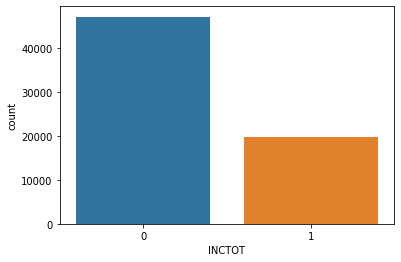

In [80]:
sns.countplot('INCTOT', data = df)

## RACE VS TARGET

In [81]:
# CREATE DF FOR CHI SQUARE
df_both = df.groupby('RACE')['INCTOT'].value_counts()
df_new = df_both.unstack()
df_new

INCTOT,0,1
RACE,,
african-american,7032,1692
asian,1684,1210
eskimo,632,137
hawaiian,93,23
mixed,848,211
white,36834,16415


In [82]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# CHI SQUARE TEST
stat, p, dof, expected = chi2_contingency(df_new)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[6.15319411e+03 2.57080589e+03]
 [2.04119025e+03 8.52809747e+02]
 [5.42389532e+02 2.26610468e+02]
 [8.18168864e+01 3.41831136e+01]
 [7.46931748e+02 3.12068252e+02]
 [3.75574775e+04 1.56915225e+04]]
probability=0.950, critical=11.070, stat=787.163)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


Text(0.5, 1.0, 'Difference of Race on Income Total')

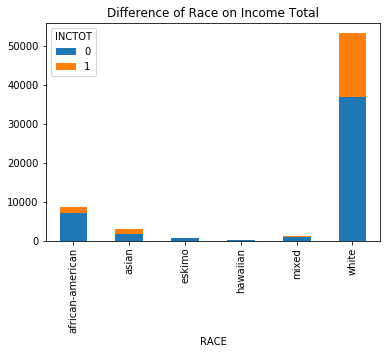

In [83]:
df_new.plot(kind='bar', stacked = True)
plt.title('Difference of Race on Income Total')

In [84]:
# DUMMIES FOR POST-HOC
dummies = pd.get_dummies(df['RACE'],drop_first=True)

In [85]:
# POST HOC TEST
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['INCTOT'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    
   # SIGNIFICANTLY HIGHER PROPORTION OF WHITE ETHNICITY MAKE OVER 50K COMPARED TO OTHER RACES

INCTOT      0      1
asian               
0       45439  18478
1        1684   1210 

Chi2 value= 221.09400100586893
p-value= 5.221036215128847e-50
Degrees of freedom= 1

INCTOT      0      1
eskimo              
0       46491  19551
1         632    137 

Chi2 value= 50.25974493320464
p-value= 1.3468421641119533e-12
Degrees of freedom= 1

INCTOT        0      1
hawaiian              
0         47030  19665
1            93     23 

Chi2 value= 4.741915472484279
p-value= 0.029436279318691354
Degrees of freedom= 1

INCTOT      0      1
mixed               
0       46275  19477
1         848    211 

Chi2 value= 46.690256761636945
p-value= 8.314135173135131e-12
Degrees of freedom= 1

INCTOT      0      1
white               
0       10289   3273
1       36834  16415 

Chi2 value= 232.6610646574323
p-value= 1.5668338422485523e-52
Degrees of freedom= 1



## RELATE VS TARGET

In [86]:
# CREATE DF FOR CHI SQUARE
dfR = df.groupby('RELATE')['INCTOT'].value_counts()
dfRI = dfR.unstack()
dfRI

INCTOT,0,1
RELATE,,
child,6702,354
grandchild,319,13
head,22471,11854
other nonrelative,409,64
other relative,770,75
parent,787,165
roommate,1235,223
sibling,676,54
spouse,11686,6356


In [97]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# CHI SQUARE TEST
stat, p, dof, expected = chi2_contingency(dfRI)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[4.97663878e+03 2.07924080e+03 1.70587932e-01]
 [2.34187528e+02 9.78436017e+01 8.02741927e-03]
 [2.42096982e+04 1.01148173e+04 8.29853749e-01]
 [3.33702774e+02 1.39421094e+02 1.14385771e-02]
 [5.96041891e+02 2.49026436e+02 2.04309692e-02]
 [6.71568732e+02 2.80581567e+02 2.30198587e-02]
 [1.02843664e+03 4.29681059e+02 3.52524841e-02]
 [5.14921855e+02 2.15134467e+02 1.76503577e-02]
 [1.27252879e+04 5.31662816e+03 4.36194116e-01]
 [1.83251571e+03 7.65625477e+02 6.28144979e-02]]
probability=0.950, critical=28.869, stat=3562.281)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


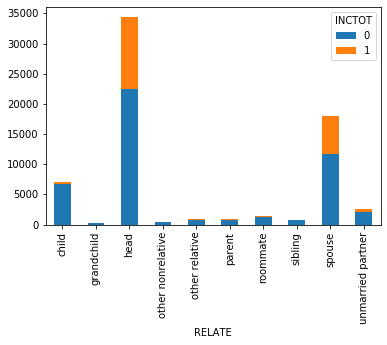

In [88]:
dfRI.plot(kind='bar', stacked = True);

In [89]:
dfRI[0]

RELATE
child                 6702
grandchild             319
head                 22471
other nonrelative      409
other relative         770
parent                 787
roommate              1235
sibling                676
spouse               11686
unmarried partner     2068
Name: 0, dtype: int64

In [90]:
dfRI['percentage_>median'] = dfRI[1]/(dfRI[0]+dfRI[1])

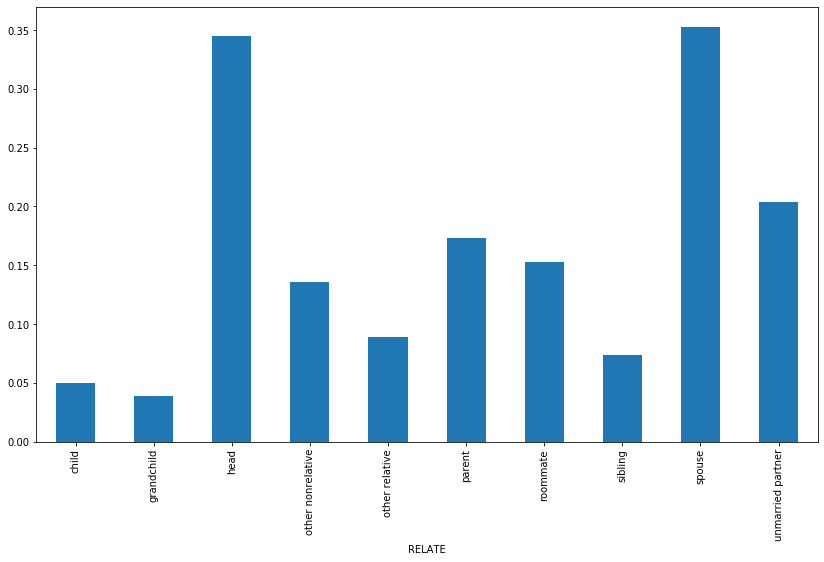

In [91]:
dfRI['percentage_>median'].plot(kind='bar', stacked=True, figsize = (14,8))


In [92]:
# DUMMIES FOR POST-HOC
dummies = pd.get_dummies(df['RELATE'],drop_first=True)


In [93]:
# POST HOC TEST
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['INCTOT'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    
# HEAD OF HOUSEHOLD MAKES MORE THAN 50K

INCTOT          0      1
grandchild              
0           46804  19675
1             319     13 

Chi2 value= 103.58494383158802
p-value= 2.494658033774648e-24
Degrees of freedom= 1

INCTOT      0      1
head                
0       24652   7834
1       22471  11854 

Chi2 value= 871.3084334112878
p-value= 1.6948635985343722e-191
Degrees of freedom= 1

INCTOT                 0      1
other nonrelative              
0                  46714  19624
1                    409     64 

Chi2 value= 57.44745713936496
p-value= 3.4712969320511024e-14
Degrees of freedom= 1

INCTOT              0      1
other relative              
0               46353  19613
1                 770     75 

Chi2 value= 173.60531979647317
p-value= 1.2071903630167e-39
Degrees of freedom= 1

INCTOT      0      1
parent              
0       46336  19523
1         787    165 

Chi2 value= 67.84759984136457
p-value= 1.7663346321791814e-16
Degrees of freedom= 1

INCTOT        0      1
roommate              
0       

## FAMREL VS TARGET

In [94]:
# CREATE DF FOR CHI SQUARE
dff = df.groupby('FAMREL')['INCTOT'].value_counts()
dffi = dff.unstack()
dffi

INCTOT,0,1
FAMREL,,
child,6090,285
not-family-member,10133,3592
other-relative,1643,133
reference-person,17131,9195
spouse,12126,6483


In [98]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# CHI SQUARE TEST
stat, p, dof, expected = chi2_contingency(dffi)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[ 4496.40216431  1878.59783569]
 [ 9680.48936552  4044.51063448]
 [ 1252.64474413   523.35525587]
 [18568.20131415  7757.79868585]
 [13125.26241188  5483.73758812]]
probability=0.950, critical=9.488, stat=3036.872)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


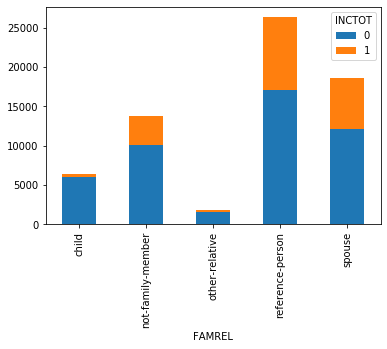

In [96]:
dffi.plot(kind='bar', stacked = True)

In [99]:
# DUMMIES FOR POST-HOC
dummies = pd.get_dummies(df['FAMREL'],drop_first=True)

In [100]:
#POST HOC TEST
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['INCTOT'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    
# SIGNIFICANT DIFFERENCES AMONGST ALL GROUPS

INCTOT                 0      1
not-family-member              
0                  36990  16096
1                  10133   3592 

Chi2 value= 90.1393317018373
p-value= 2.2196501087123138e-21
Degrees of freedom= 1

INCTOT              0      1
other-relative              
0               45480  19555
1                1643    133 

Chi2 value= 422.98607044446237
p-value= 5.463842031849005e-94
Degrees of freedom= 1

INCTOT                0      1
reference-person              
0                 29992  10493
1                 17131   9195 

Chi2 value= 622.5343817946083
p-value= 2.1015520101198394e-137
Degrees of freedom= 1

INCTOT      0      1
spouse              
0       34997  13205
1       12126   6483 

Chi2 value= 357.4749953154716
p-value= 9.986234765909915e-80
Degrees of freedom= 1



In [177]:
df.groupby('FAMREL').INCTOT.value_counts()

FAMREL             INCTOT
child              0          6090
                   1           285
not-family-member  0         10133
                   1          3592
other-relative     0          1643
                   1           133
reference-person   0         17131
                   1          9195
spouse             0         12126
                   1          6483
Name: INCTOT, dtype: int64

## EDUCATION VS. TARGET

In [45]:
# CREATE DF FOR CHI SQUARE
dfe = dff = df.groupby('EDUC')['INCTOT'].value_counts()
dfei = dfe.unstack()
dfei

INCTOT,0,1
EDUC,,
"12th grade, no diploma",749,53
"Associate's degree, academic program",3041,998
"Associate's degree, occupational/vocational program",2406,843
Bachelor's degree,8924,6722
Doctorate degree,351,1082
Grade 10,1072,64
Grade 11,1511,93
Grade 9,782,52
"Grades 1, 2, 3, or 4",202,11


In [101]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# CHI SQUARE TEST
stat, p, dof, expected = chi2_contingency(dfei)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[  565.66502522   236.33497478]
 [ 2848.77934771  1190.22065229]
 [ 2291.57813833   957.42186167]
 [11035.4052177   4610.5947823 ]
 [ 1010.72067474   422.27932526]
 [  801.24123273   334.75876727]
 [ 1131.33005044   472.66994956]
 [  588.23520079   245.76479921]
 [  150.23273114    62.76726886]
 [  427.42269985   178.57730015]
 [  433.77056173   181.22943827]
 [12405.83806559  5183.16193441]
 [ 4704.47097035  1965.52902965]
 [   71.23711664    29.76288336]
 [  796.30400683   332.69599317]
 [ 7860.7689602   3284.2310398 ]]
probability=0.950, critical=24.996, stat=10555.114)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


In [108]:
# DUMMIES FOR POST-HOC
dummies = pd.get_dummies(df['EDUC'],drop_first=True)
dummies.head()

,"Associate's degree, academic program","Associate's degree, occupational/vocational program",Bachelor's degree,Doctorate degree,Grade 10,Grade 11,Grade 9,"Grades 1, 2, 3, or 4",Grades 5 or 6,Grades 7 or 8,High school diploma or equivalent,Master's degree,None or preschool,Professional school degree,Some college but no degree
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [105]:
#POST HOC TEST
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['INCTOT'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    
# DOCTORATE, MASTERS, AND PROFESSIONAL SCHOOL DEGREE MAKE MORE THAN MEDIAN INCOME

INCTOT                                    0      1
Associate's degree, academic program              
0                                     44082  18690
1                                      3041    998 

Chi2 value= 46.602301052194704
p-value= 8.69580812183319e-12
Degrees of freedom= 1

INCTOT                                                  0      1
Associate's degree, occupational/vocational pro...              
0                                                   44717  18845
1                                                    2406    843 

Chi2 value= 20.201158030095794
p-value= 6.9710722457339465e-06
Degrees of freedom= 1

INCTOT                 0      1
Bachelor's degree              
0                  38199  12966
1                   8924   6722 

Chi2 value= 1789.2480266250932
p-value= 0.0
Degrees of freedom= 1

INCTOT                0      1
Doctorate degree              
0                 46772  18606
1                   351   1082 

Chi2 value= 1491.0534163797206
p-value=

In [110]:
df.groupby('EDUC').INCTOT.value_counts()

EDUC                                                 INCTOT
12th grade, no diploma                               0           749
                                                     1            53
Associate's degree, academic program                 0          3041
                                                     1           998
Associate's degree, occupational/vocational program  0          2406
                                                     1           843
Bachelor's degree                                    0          8924
                                                     1          6722
Doctorate degree                                     1          1082
                                                     0           351
Grade 10                                             0          1072
                                                     1            64
Grade 11                                             0          1511
                                           

In [102]:
education = df.groupby(['EDUC', 'INCTOT'])['EDUC'].count().unstack()
education.fillna(value = 0, inplace = True)
education['percentage_>median'] = education[1]/(education[0]+education[1])
education.sort_values(by='percentage_>median',ascending = False, inplace = True)
education

INCTOT,0,1,percentage_>median
EDUC,,,
Doctorate degree,351,1082,0.755059
Professional school degree,283,846,0.749336
Master's degree,2733,3937,0.590255
Bachelor's degree,8924,6722,0.429631
"Associate's degree, occupational/vocational program",2406,843,0.259464
"Associate's degree, academic program",3041,998,0.247091
Some college but no degree,8986,2159,0.193719
High school diploma or equivalent,14850,2739,0.155722
Grades 7 or 8,562,53,0.086179


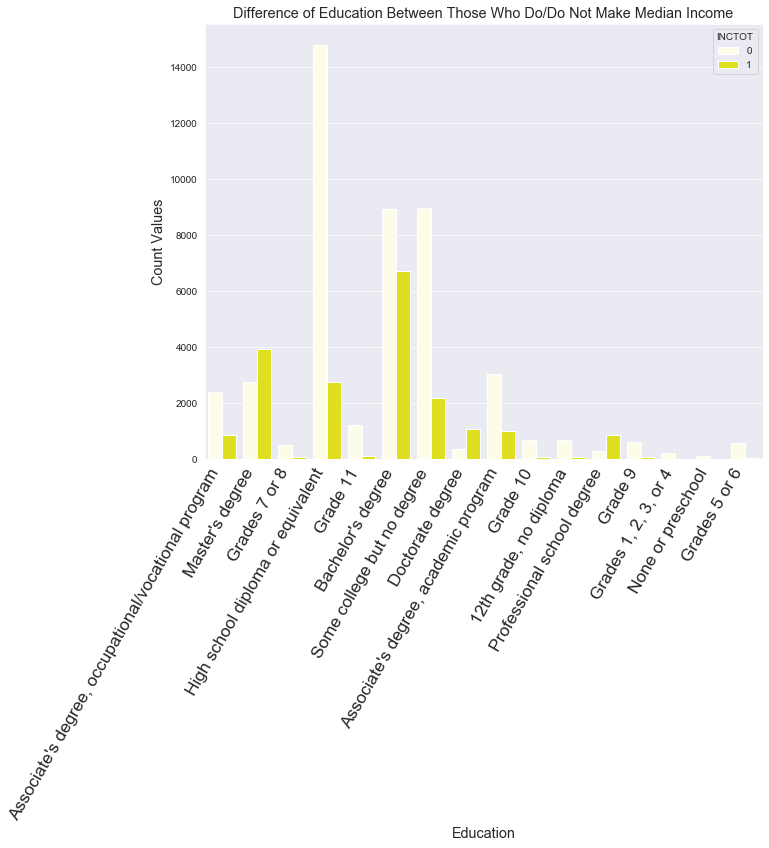

In [299]:
# BAR PLOT TO SHOW DISTRIBUTION

plt.figure(figsize = (10,8))
ax= sns.countplot(x='EDUC',hue='INCTOT',data=df, color='yellow')
ax.set_title('Difference of Education Between Those Who Do/Do Not Make Median Income',fontdict={'fontsize':'x-large'})
ax.set_xlabel('Education',fontdict={'fontsize':'x-large'})
ax.set_ylabel('Count Values',fontdict={'fontsize':'x-large'})
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='xx-large')
plt.show();

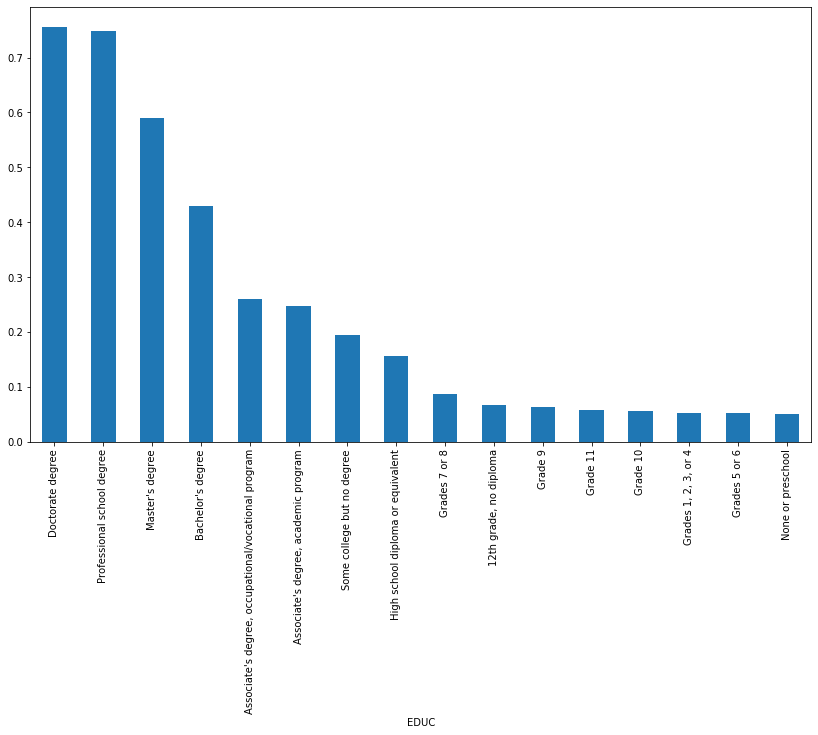

In [103]:
education['percentage_>median'].plot(kind='bar', figsize = (14,8))

## CLASSWKR VS. TARGET

In [111]:
classwrk = df.groupby(['CLASSWKR', 'INCTOT'])['CLASSWKR'].count().unstack()
classwrk.fillna(value = 0, inplace = True)
classwrk['percentage_>median'] = classwrk[1]/(classwrk[0]+classwrk[1])
classwrk.sort_values(by='percentage_>median',ascending = False, inplace = True)
classwrk

INCTOT,0,1,percentage_>median
CLASSWKR,,,
Governemnt,6303,3450,0.353737
Self-Employed,4393,2275,0.341182
Private,36383,13959,0.277283
Unpaid family worker,44,4,0.083333


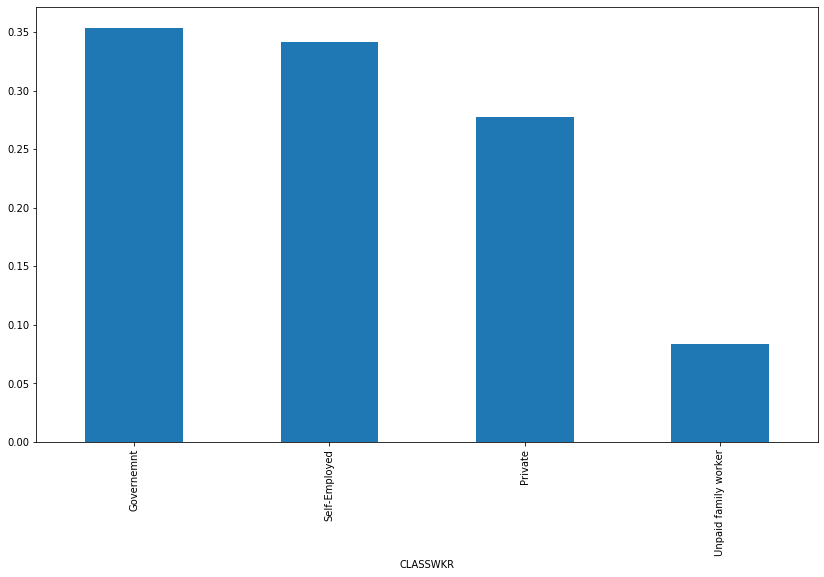

In [112]:
classwrk['percentage_>median'].plot(kind='bar', figsize = (14,8))

In [114]:
# CREATE DF FOR CHI SQUARE
dfc = df.groupby('CLASSWKR')['INCTOT'].value_counts()
dfci = dfc.unstack()

In [115]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# CHI SQUARE TEST
stat, p, dof, expected = chi2_contingency(dfci)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[6.87896632e+03 2.87403368e+03]
 [3.55071181e+04 1.48348819e+04]
 [4.70306033e+03 1.96493967e+03]
 [3.38552634e+01 1.41447366e+01]]
probability=0.950, critical=7.815, stat=316.654)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


In [116]:
# DUMMIES FOR POST-HOC
dummies = pd.get_dummies(df['CLASSWKR'],drop_first=True)
dummies.head()

,Private,Self-Employed,Unpaid family worker
1,0,0,0
2,1,0,0
6,0,1,0
7,0,1,0
8,1,0,0


In [118]:
#POST HOC TEST
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['INCTOT'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    
# PEOPLE IN PRIVATE SECTOR MAKE MORE THAN MEDIAN INCOME

INCTOT       0      1
Private              
0        10740   5729
1        36383  13959 

Chi2 value= 297.1028619543273
p-value= 1.4091921899893937e-66
Degrees of freedom= 1

INCTOT             0      1
Self-Employed              
0              42730  17413
1               4393   2275 

Chi2 value= 76.81027502851825
p-value= 1.881959082666455e-18
Degrees of freedom= 1

INCTOT                    0      1
Unpaid family worker              
0                     47079  19684
1                        44      4 

Chi2 value= 9.330674742173564
p-value= 0.0022534936142687774
Degrees of freedom= 1



## AGE VS INCTOT

In [201]:
age = df.groupby(['AGE', 'INCTOT'])['AGE'].count().unstack()
age.fillna(value = 0, inplace = True)
age['percentage_>median'] = age[1]/(age[0]+age[1])
age.sort_values(by='age',ascending = True, inplace = True)

KeyError: 'age'

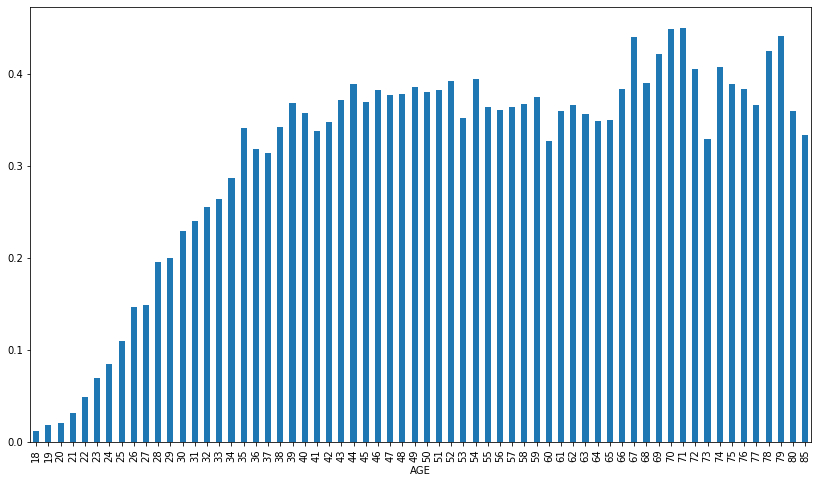

In [204]:
# DISTRIBUTION OF AGE
age['percentage_>median'].plot(kind='bar', figsize = (14,8));

In [120]:
# CREATING CLASSES FOR T-TEST
class_0 = df.loc[df['INCTOT'] == 0]
class_1 = df.loc[df['INCTOT'] == 1]

In [121]:
# CALCULATING AVERAGE AGES
age1 = df.loc[df['INCTOT']==0]['AGE'].mean()
age2 = df.loc[df['INCTOT']==1]['AGE'].mean()
age1,age2

(40.422978163529486, 46.9373222267371)

In [122]:
# TWO SAMPLE T-TEST BETWEEN DEFAULT ON TARGET
print(stats.ttest_ind(class_0['AGE'], class_1['AGE'], equal_var=False))
print('WE REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS LESS THAN 0.05. THOSE THAT DO MAKE MORE THAN 50K ARE SIGNIFICANTLY OLDER')

Ttest_indResult(statistic=-59.515059643259235, pvalue=0.0)
WE REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS LESS THAN 0.05. THOSE THAT DO MAKE MORE THAN 50K ARE SIGNIFICANTLY OLDER


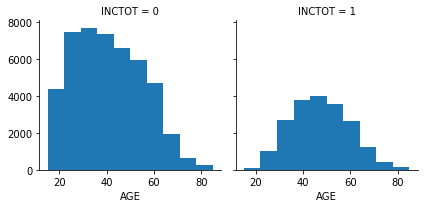

In [123]:
g = sns.FacetGrid(df, col = 'INCTOT')
g.map(plt.hist, 'AGE');

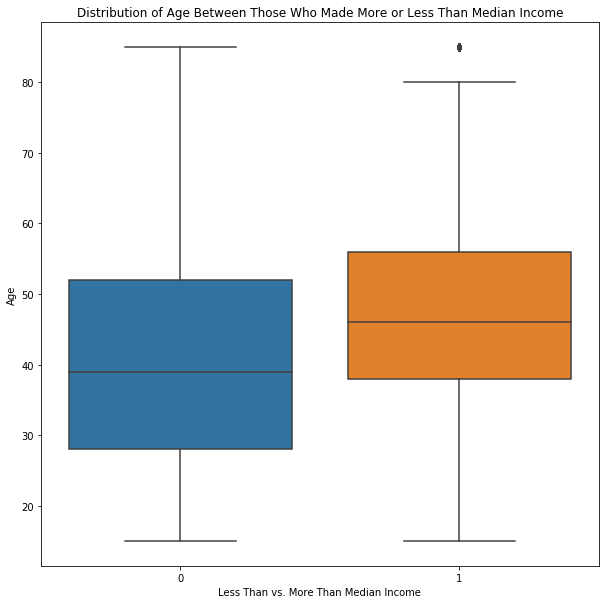

In [124]:
# DISTRIBUTION OF AGE 
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="INCTOT", y="AGE", data=df)
plt.title('Distribution of Age Between Those Who Made More or Less Than Median Income')
plt.ylabel('Age')
plt.xlabel('Less Than vs. More Than Median Income')
plt.show()

## UHRSWORK1 VS INCTOT

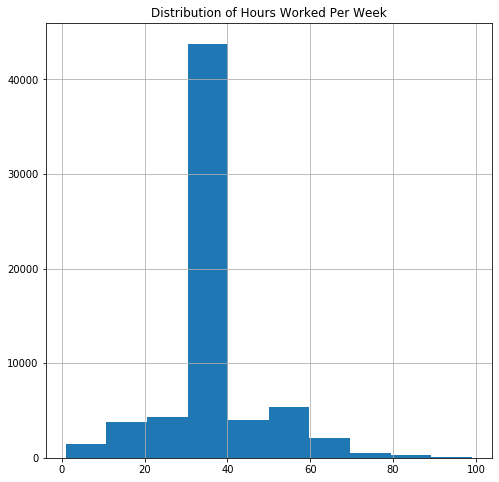

In [277]:
df.UHRSWORK1.hist(figsize=(8,8))
plt.title('Distribution of Hours Worked Per Week')
plt.show();

In [127]:
HRS1 = df.loc[df['INCTOT']==0]['UHRSWORK1'].mean()
HRS2 = df.loc[df['INCTOT']==1]['UHRSWORK1'].mean()
HRS1,HRS2

(37.08469324958089, 42.879672897196265)

In [128]:
# TWO SAMPLE T-TEST BETWEEN DEFAULT ON TARGET
print(stats.ttest_ind(class_0['UHRSWORK1'], class_1['UHRSWORK1'], equal_var=False))
print('WE REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS LESS THAN 0.05. THOSE THAT DO MAKE MORE THAN 50K ARE SIGNIFICANTLY OLDER')

Ttest_indResult(statistic=-68.02547821605323, pvalue=0.0)
WE REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS LESS THAN 0.05. THOSE THAT DO MAKE MORE THAN 50K ARE SIGNIFICANTLY OLDER


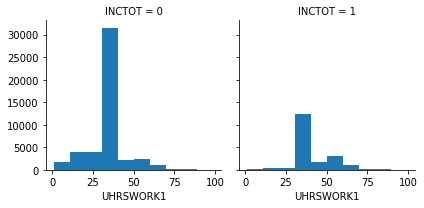

In [129]:
g = sns.FacetGrid(df, col = 'INCTOT')
g.map(plt.hist, 'UHRSWORK1');

## RELATE

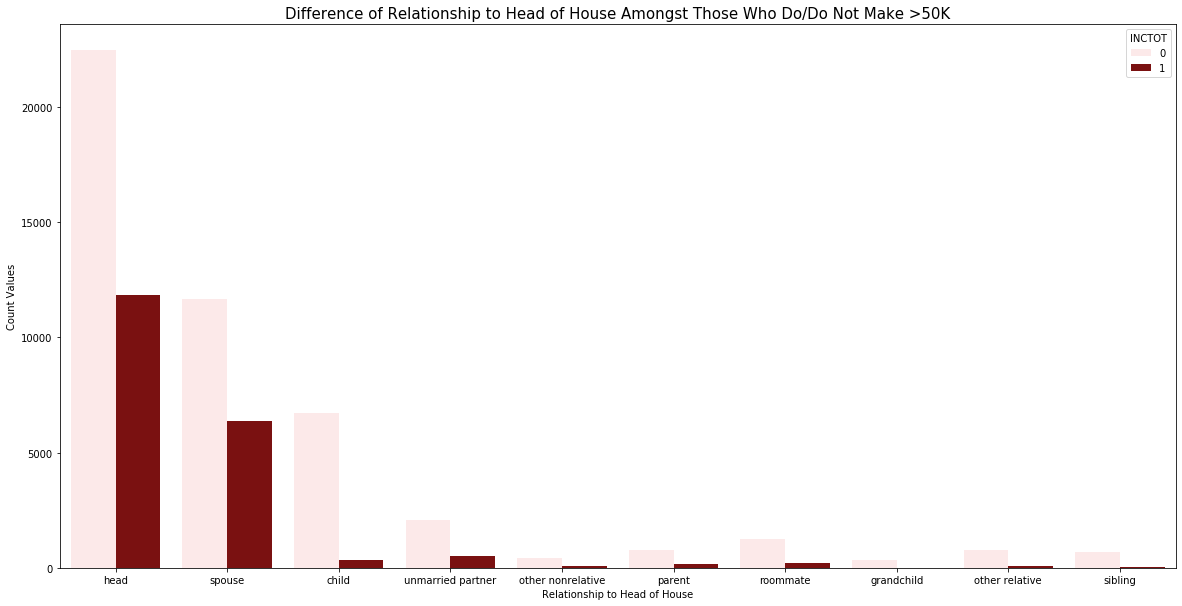

In [133]:
# BAR PLOT TO SHOW DISTRIBUTION
fig,ax=plt.subplots(figsize=(20,10))
ax= sns.countplot(x='RELATE',hue='INCTOT',data=df, color='darkred')
ax.set_title('Difference of Relationship to Head of House Amongst Those Who Do/Do Not Make >50K',fontsize=15)
ax.set_xlabel('Relationship to Head of House')
ax.set_ylabel('Count Values')
plt.show();

In [134]:
df.columns

Index(['ASECWT', 'RELATE', 'AGE', 'SEX', 'RACE', 'MARST', 'POPSTAT', 'VETSTAT',
       'FAMREL', 'BPL', 'YRIMMIG', 'OCC2010', 'IND1990', 'CLASSWKR',
       'UHRSWORK1', 'EDUC', 'EDUC99', 'DIFFANY', 'INCTOT'],
      dtype='object')

In [135]:
# CREATE DF FOR CHI SQUARE
dfre = df.groupby('RELATE')['INCTOT'].value_counts()
dfrei = dfre.unstack()

In [136]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# CHI SQUARE TEST
stat, p, dof, expected = chi2_contingency(dfrei)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[ 4976.72371316  2079.27628684]
 [  234.16557154    97.83442846]
 [24210.03988864 10114.96011136]
 [  333.61540764   139.38459236]
 [  595.99369864   249.00630136]
 [  671.4627232    280.5372768 ]
 [ 1028.3536244    429.6463756 ]
 [  514.88213019   215.11786981]
 [12725.3471135   5316.6528865 ]
 [ 1832.41612908   765.58387092]]
probability=0.950, critical=16.919, stat=3558.372)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


In [137]:
# DUMMIES FOR POST-HOC
dummies = pd.get_dummies(df['RELATE'],drop_first=True)


,grandchild,head,other nonrelative,other relative,parent,roommate,sibling,spouse,unmarried partner
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0


In [139]:
#POST HOC TEST
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['INCTOT'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    
# HEAD OF HOUSE MAKES MORE THAN MEDIAN INCOME

INCTOT          0      1
grandchild              
0           46804  19675
1             319     13 

Chi2 value= 103.58494383158802
p-value= 2.494658033774648e-24
Degrees of freedom= 1

INCTOT      0      1
head                
0       24652   7834
1       22471  11854 

Chi2 value= 871.3084334112878
p-value= 1.6948635985343722e-191
Degrees of freedom= 1

INCTOT                 0      1
other nonrelative              
0                  46714  19624
1                    409     64 

Chi2 value= 57.44745713936496
p-value= 3.4712969320511024e-14
Degrees of freedom= 1

INCTOT              0      1
other relative              
0               46353  19613
1                 770     75 

Chi2 value= 173.60531979647317
p-value= 1.2071903630167e-39
Degrees of freedom= 1

INCTOT      0      1
parent              
0       46336  19523
1         787    165 

Chi2 value= 67.84759984136457
p-value= 1.7663346321791814e-16
Degrees of freedom= 1

INCTOT        0      1
roommate              
0       

## RACE 

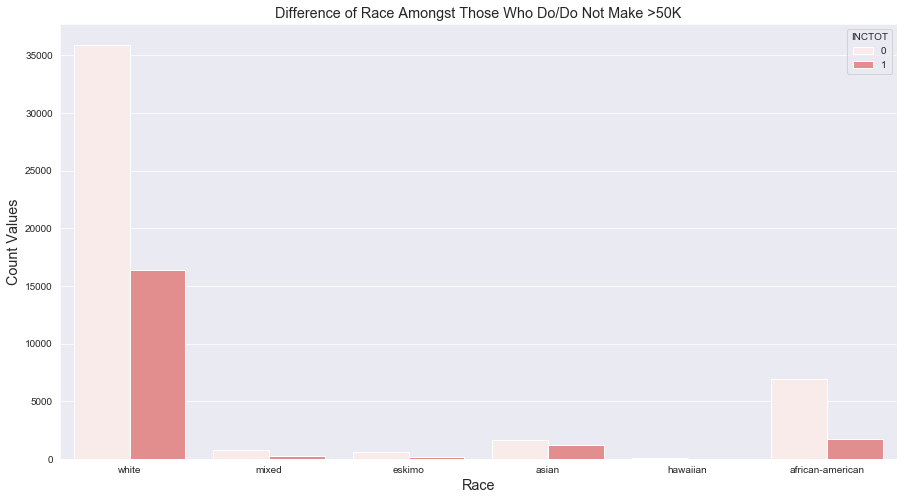

In [305]:
# BAR PLOT TO SHOW DISTRIBUTION
fig,ax=plt.subplots(figsize=(15,8))
ax= sns.countplot(x='RACE',hue='INCTOT',data=df, color='lightcoral')
ax.set_title('Difference of Race Amongst Those Who Do/Do Not Make >50K',fontdict={'fontsize':'x-large'})
ax.set_xlabel('Race',fontdict={'fontsize':'x-large'})
ax.set_ylabel('Count Values',fontdict={'fontsize':'x-large'})
plt.show();

In [ ]:
df

## BPL

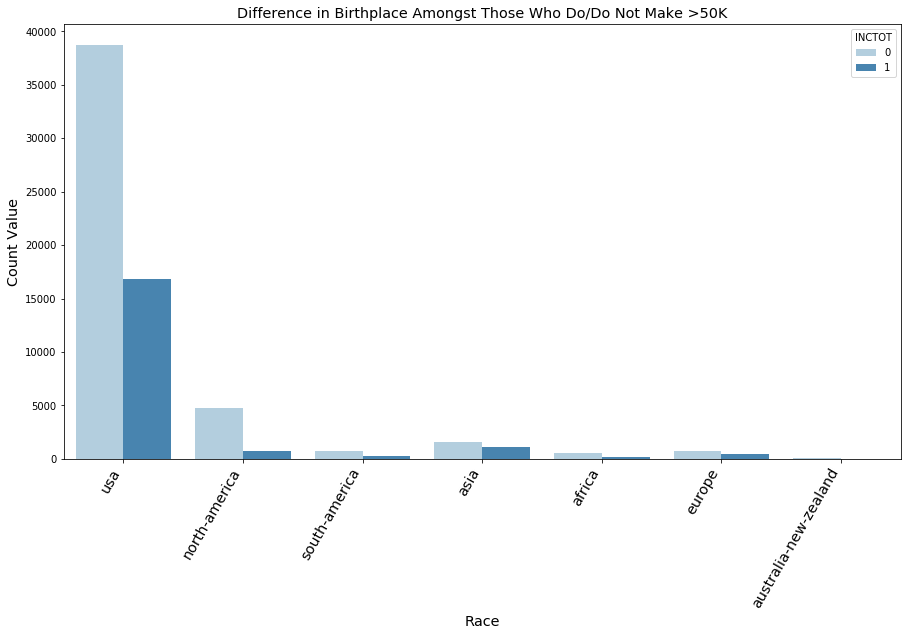

In [141]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="BPL",hue='INCTOT', data=df,palette='Blues')
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#             height + 3,
#             '{:1.2f}'.format((height/total)*100),
#             ha="center") 
ax.set_title('Difference in Birthplace Amongst Those Who Do/Do Not Make >50K', fontdict={'fontsize':'x-large'})
ax.set_xlabel('Race', fontdict={'fontsize':'x-large'})
ax.set_ylabel('Count Value', fontdict={'fontsize':'x-large'})
ax.set_xticklabels(
ax.get_xticklabels(), 
rotation=60, 
horizontalalignment='right',
fontweight='light',
fontsize='x-large');    
plt.show()

In [143]:
# CREATE DF FOR CHI SQUARE
dfb = df.groupby('BPL')['INCTOT'].value_counts()
dfbi = dfb.unstack()

In [144]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# CHI SQUARE TEST
stat, p, dof, expected = chi2_contingency(dfbi)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[4.95838545e+02 2.07161455e+02]
 [1.88954689e+03 7.89453114e+02]
 [5.57201209e+01 2.32798791e+01]
 [8.54845400e+02 3.57154600e+02]
 [3.92791587e+03 1.64108413e+03]
 [6.74283995e+02 2.81716005e+02]
 [3.92248492e+04 1.63881508e+04]]
probability=0.950, critical=12.592, stat=969.044)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


In [145]:
# DUMMIES FOR POST-HOC
dummies = pd.get_dummies(df['BPL'],drop_first=True)

,asia,australia-new-zealand,europe,north-america,south-america,usa
1,0,0,0,0,0,1
2,0,0,0,0,0,1
6,0,0,0,1,0,0
7,0,0,0,0,0,1
8,0,0,0,0,0,1


In [147]:
#POST HOC TEST
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['INCTOT'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    
# THOSE BORN IN USA MAKE MORE THAN MEDIAN

INCTOT      0      1
asia                
0       45574  18558
1        1549   1130 

Chi2 value= 216.3413279812063
p-value= 5.6815008510915454e-49
Degrees of freedom= 1

INCTOT                     0      1
australia-new-zealand              
0                      47064  19668
1                         59     20 

Chi2 value= 0.4711942227067003
p-value= 0.49243828271592105
Degrees of freedom= 1

INCTOT      0      1
europe              
0       46407  19192
1         716    496 

Chi2 value= 77.38182902272275
p-value= 1.4090560023290864e-18
Degrees of freedom= 1

INCTOT             0      1
north-america              
0              42332  18910
1               4791    778 

Chi2 value= 701.2707609456801
p-value= 1.58259282422192e-154
Degrees of freedom= 1

INCTOT             0      1
south-america              
0              46413  19442
1                710    246 

Chi2 value= 6.332029189050567
p-value= 0.011857656936742678
Degrees of freedom= 1

INCTOT      0      1
usa          

## ASECWT VS INCTOT

In [148]:
df.groupby('INCTOT').ASECWT.mean()

INCTOT
0    1870.479512
1    1876.623954
Name: ASECWT, dtype: float64

In [149]:
asecwt1 = df.loc[df['INCTOT']==0]['ASECWT'].mean()
asecwt2 = df.loc[df['INCTOT']==1]['ASECWT'].mean()
asecwt1,asecwt2

(1870.4795117034148, 1876.6239541852908)

In [150]:
# TWO SAMPLE T-TEST BETWEEN DEFAULT ON TARGET
print(stats.ttest_ind(class_0['ASECWT'], class_1['ASECWT'], equal_var=False))
print('WE FAIL TO REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS MORE THAN 0.05')

Ttest_indResult(statistic=-0.6109282326902186, pvalue=0.5412508139700223)
WE FAIL TO REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS MORE THAN 0.05


In [151]:
df.ASECWT.describe()

count    66811.000000
mean      1872.290168
std       1191.448545
min         96.650000
25%        866.920000
50%       1795.690000
75%       2484.010000
max       9869.740000
Name: ASECWT, dtype: float64

## SEX VS TARGET

In [155]:
# CREATE DF FOR CHI SQUARE
dfs = df.groupby('SEX')['INCTOT'].value_counts()
dfsi = dfs.unstack()

In [156]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# CHI SQUARE TEST
stat, p, dof, expected = chi2_contingency(dfsi)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[24327.8279924 10164.1720076]
 [22795.1720076  9523.8279924]]
probability=0.950, critical=3.841, stat=2170.144)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


In [167]:
df.groupby('SEX').INCTOT.mean()
# MALES MAKE MORE THAN MEDIAN

SEX
1    0.374232
2    0.209784
Name: INCTOT, dtype: float64

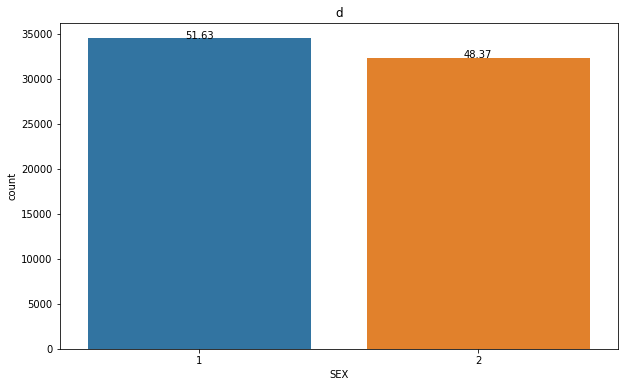

In [169]:
plt.figure(figsize=(10,6))
total = float(len(df) )

ax = sns.countplot(x="SEX", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title("Difference in Sex Between ")
plt.show()

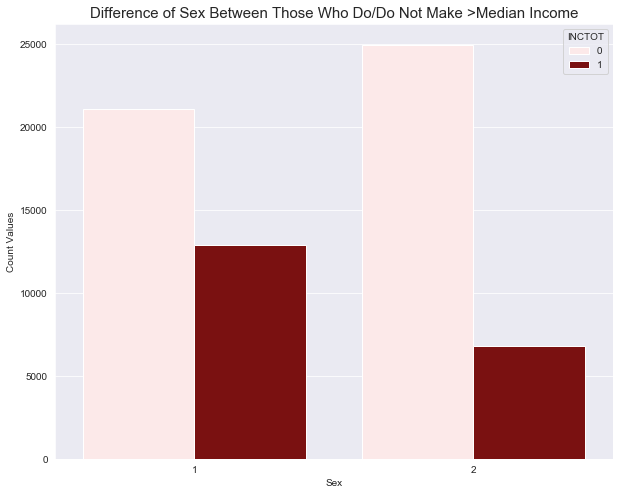

In [301]:
# BAR PLOT TO SHOW DISTRIBUTION
plt.figure(figsize = (10,8))
ax= sns.countplot(x='SEX',hue='INCTOT',data=df, color='darkred')
ax.set_title('Difference of Sex Between Those Who Do/Do Not Make >Median Income',fontsize=15)
ax.set_xlabel('Sex')
ax.set_ylabel('Count Values')
plt.show();

In [302]:
df.groupby('SEX').INCTOT.value_counts()

SEX  INCTOT
1    0         21083
     1         12904
2    0         24972
     1          6780
Name: INCTOT, dtype: int64

# Feature Engineering

In [173]:
#BIN AGE COLUMN
bins=[0,25,34,90]
labels=[0,1,2]
df['AGE_NEW'] = pd.cut(df['AGE'],bins=bins, labels=labels)

In [174]:
conditions = [
    df['EDUC'] == "Associate's degree, occupational/vocational program",
    df['EDUC'] == "Master's degree",
    df['EDUC'] == 'Grades 7 or 8',
    df['EDUC'] == 'High school diploma or equivalent',
    df['EDUC'] == 'Grade 11',
    df['EDUC'] == "Bachelor's degree",
    df['EDUC'] == 'Some college but no degree',
    df['EDUC'] == 'Doctorate degree',
    df['EDUC'] == "Associate's degree, academic program",
    df['EDUC'] == 'Grade 10',
    df['EDUC'] == '12th grade, no diploma',
    df['EDUC'] == 'Professional school degree',
    df['EDUC'] == 'Grade 9',
    df['EDUC'] == 'Grades 1, 2, 3, or 4',
    df['EDUC'] == 'None or preschool',
    df['EDUC'] == 'Grades 5 or 6'
]

choices = [
    1,
    2,
    0,
    1,
    0,
    2,
    1,
    3,
    1,
    0,
    0,
    3,
    0,
    0,
    0,
    0
]

In [175]:
df['EDUCATION'] = np.select(conditions, choices, df['EDUC'])

In [176]:
# MAKE HOURS WORKED PER WEEK BINARY
df['WORK_HRS'] = np.where(df['UHRSWORK1'] >36, 1, 0)

In [ ]:
#EXPORT DF TO MODEL
df.to_csv('Modeling_set.csv')